In [2]:
import numpy
import os

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision

from PIL import Image
import pathlib
import matplotlib.image as Img
import matplotlib.pyplot as plt

In [3]:
path = "/home/revanth/cats_dogs/My-Projects/Cats_Dogs/Datasets/Cats_V1/training_set/training_set/"


In [4]:
cats = list(pathlib.Path(path).glob("cats/*"))
dogs = list(pathlib.Path(path).glob("dogs/*"))
total = cats+dogs

In [5]:
len(total)

8007

In [6]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [7]:
batch = 128

model_data = torchvision.datasets.ImageFolder(path,transform=transform)
train_data = DataLoader(model_data,batch_size=batch,shuffle=True)

In [8]:
import torch.nn.functional as F
class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.conv3 = nn.Conv2d(16, 24, 3, 1)
        
        self.fc1   = nn.Linear(24*60*60, 300)
        self.fc2   = nn.Linear(300, 200)
        self.fc3   = nn.Linear(200, 2)
            
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        
        # print(X.shape)
        X = X.view(-1, 24*60*60)
    
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return X

In [18]:
model = CNN_model()
optim = torch.optim.Adam(params=model.parameters(),lr=0.001,betas=(0.98,0.988),weight_decay=0,eps=10e-8)
loss = nn.CrossEntropyLoss()

# hist,loss1 = training_loop(20,model=model,optimizer=optim,loss_fn=loss,train_loader=train_dataset_loader,valid_dl=valid_dataset_loader)
device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)
# loss.to(device)
history = []
loss_val = []
for epoch in range(20):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{20}] => loss: {loss1}")



Epoch [0/20] => loss: 0.695044755935669
Epoch [1/20] => loss: 0.6581804156303406
Epoch [2/20] => loss: 0.6539754271507263
Epoch [3/20] => loss: 0.6229565143585205
Epoch [4/20] => loss: 0.5645384192466736
Epoch [5/20] => loss: 0.5403835773468018
Epoch [6/20] => loss: 0.5029779076576233
Epoch [7/20] => loss: 0.6400671005249023
Epoch [8/20] => loss: 0.6442445516586304
Epoch [9/20] => loss: 0.5600414276123047


KeyboardInterrupt: 

In [11]:
for epoch in range(20):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{20}] => loss: {loss1}")

Epoch [0/20] => loss: 0.14184437692165375
Epoch [1/20] => loss: 0.0640539899468422
Epoch [2/20] => loss: 0.1746731549501419
Epoch [3/20] => loss: 0.18296828866004944
Epoch [4/20] => loss: 0.05760857090353966
Epoch [5/20] => loss: 0.1207498162984848
Epoch [6/20] => loss: 0.030661268159747124


KeyboardInterrupt: 

[0.695044755935669, 0.6581804156303406, 0.6539754271507263, 0.6229565143585205, 0.5645384192466736, 0.5403835773468018, 0.5029779076576233, 0.6400671005249023, 0.6442445516586304, 0.5600414276123047]


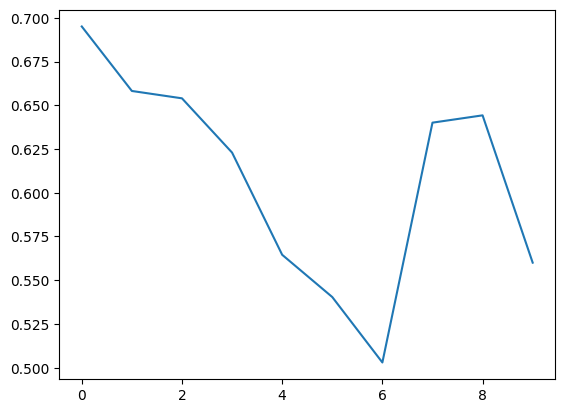

In [19]:
loss1 = []
for i in loss_val:
    loss1.append(i.item())
print(loss1)
plt.plot(range(len(loss1)),loss1)

In [13]:
test_transform = transforms.Compose([
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [14]:
test_path = "/home/revanth/cats_dogs/My-Projects/Cats_Dogs/Datasets/Cats_V1/test_set/test_set/"
batch = 128

model_test_data = torchvision.datasets.ImageFolder(test_path,transform=test_transform)
test_data = DataLoader(model_test_data,batch_size=batch,shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


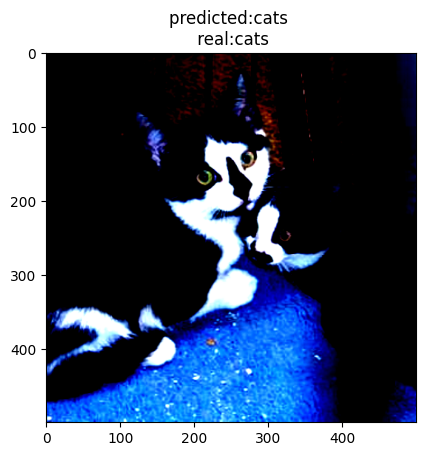

In [16]:
with torch.no_grad():
    test = []
    predicted = []

    for img,label in test_data:
        imgs = img[48].to(device)
        labels = label[48].to(device)
        test.append(labels)
        output_model = imgs.unsqueeze(0)
        # print(imgs.shape)
        output_model = model(output_model)
        # print(output_model)
        index = output_model.argmax()
        predicted.append(index)
        # imgs = torchvision.transforms.ToPILImage(imgs)
        plt.imshow(imgs.detach().cpu().numpy().transpose(1,2,0))
        plt.title(f"predicted:{ model_test_data.classes[index]} \n real:{ model_test_data.classes[labels]}")
        break

In [17]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_data:
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(model_test_data)} = {correct.item()*100/(len(model_test_data)):7.3f}%')

Test accuracy: 1603/2023 =  79.239%


In [1]:
print(loss1)

NameError: name 'loss1' is not defined

In [ ]:
print(loss1)